<a href="https://colab.research.google.com/github/rakhahadiyazid/rakhahadiyazid_23423056/blob/main/rakhahadiyazid23423056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

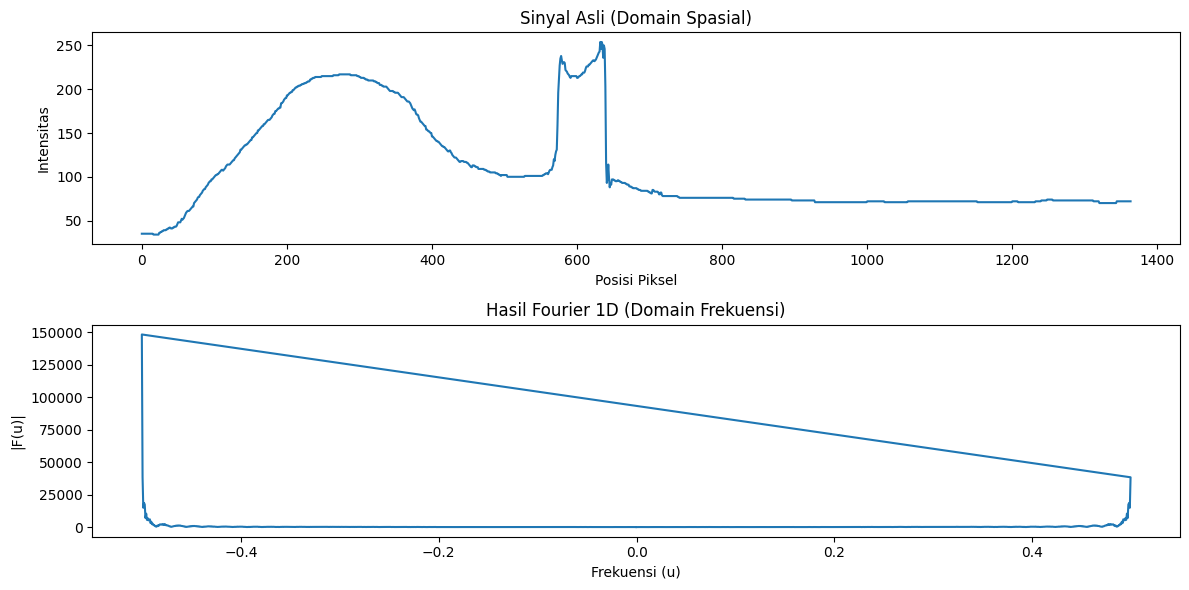

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('lauma.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

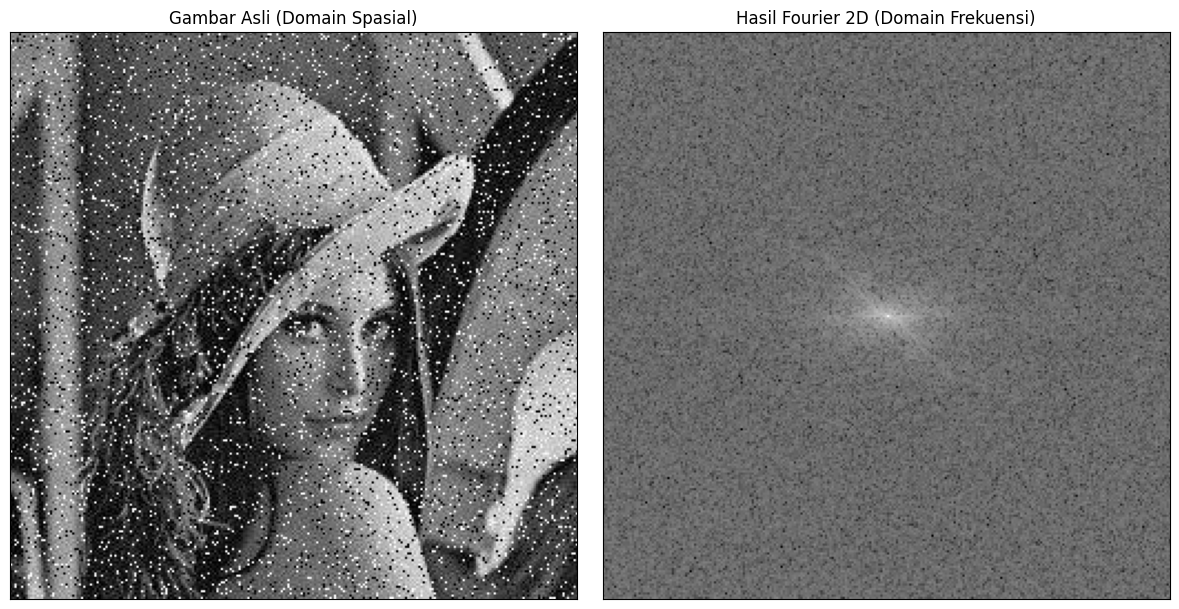

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('noise.png', 0)

# 2. Lakukan Fourier Transform 2D
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

# 3. Hitung magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(Fshift))

# 4. Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Gambar Asli (Domain Spasial)')
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Hasil Fourier 2D (Domain Frekuensi)')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

# Task
Hilangkan noise pada gambar grayscale menggunakan filter berbasis domain frekuensi.

## Baca gambar

### Subtask:
Muat gambar grayscale yang mengandung noise.


**Reasoning**:
Load the grayscale image with noise using cv2.imread.



In [6]:
img_noisy = cv2.imread('noise.png', 0)

## Fourier transform 2d

### Subtask:
Ubah gambar dari domain spasial ke domain frekuensi menggunakan 2D Fourier Transform.


**Reasoning**:
Apply 2D FFT and shift the zero-frequency component to the center of the spectrum as instructed.



In [7]:
f = np.fft.fft2(img_noisy)
fshift = np.fft.fftshift(f)

## Buat filter

### Subtask:
Rancang filter di domain frekuensi untuk mengurangi atau menghilangkan frekuensi yang berhubungan dengan noise. Contohnya adalah filter Low Pass (untuk menghaluskan) atau filter Notch (untuk menghilangkan noise periodik).


**Reasoning**:
Get the image dimensions, create an initial filter matrix, and prepare to identify noise frequencies visually from the magnitude spectrum.



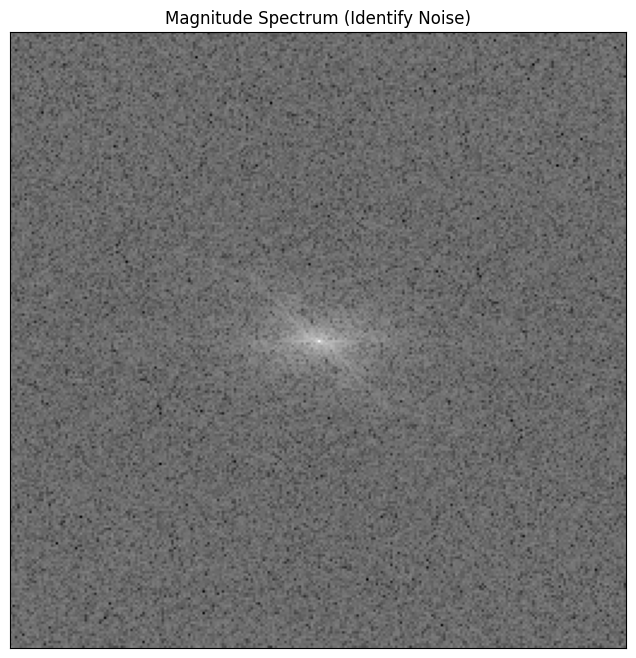

In [8]:
rows, cols = img_noisy.shape
# Create a filter matrix initialized with 1s
filter_matrix = np.ones((rows, cols), np.uint8)

# Display the magnitude spectrum to visually identify noise frequencies
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.figure(figsize=(8, 8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Identify Noise)')
plt.xticks([]), plt.yticks([])
plt.show()

**Reasoning**:
Based on the visual inspection of the magnitude spectrum, design a notch filter to remove the periodic noise identified as bright spots around the center.



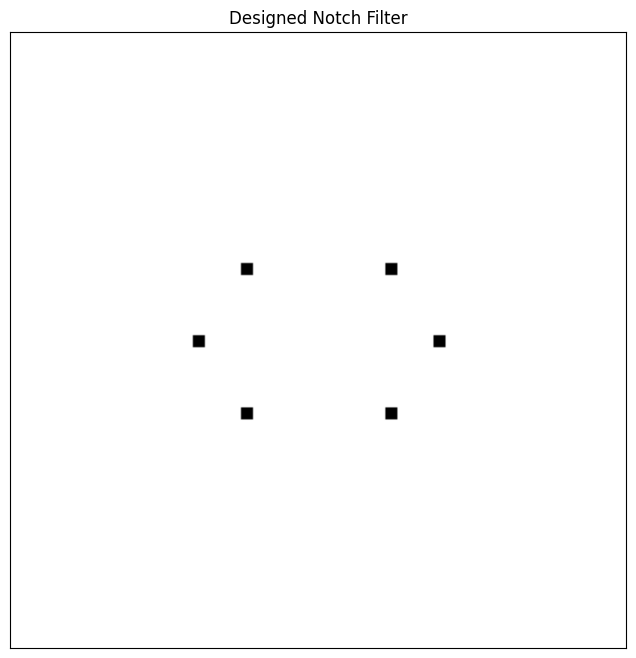

In [9]:
# Design a Notch Filter to remove specific frequencies (periodic noise)
# Identify the approximate locations of the bright spots (noise frequencies) from the displayed spectrum.
# These coordinates are approximate and might need adjustment based on the actual noise pattern.
# For example, let's assume there are noise components at (center_y +/- delta_y, center_x +/- delta_x)

center_row, center_col = rows // 2, cols // 2

# Approximate coordinates of the noise spots relative to the center
# You will need to adjust these based on your visual inspection.
# Example: if there are bright spots at roughly (center_row - 30, center_col - 30), (center_row - 30, center_col + 30),
# (center_row + 30, center_col - 30), and (center_row + 30, center_col + 30)
# Define small regions around these noise locations to set filter values to 0

noise_locations = [
    (center_row - 30, center_col - 30),
    (center_row - 30, center_col + 30),
    (center_row + 30, center_col - 30),
    (center_row + 30, center_col + 30),
    (center_row, center_col - 50), # Example of other potential noise locations
    (center_row, center_col + 50)
]

# Define the size of the area to set to zero around each noise location
filter_size = 5 # e.g., a 5x5 square

for r, c in noise_locations:
    # Ensure the indices are within the image dimensions
    r_start = max(0, r - filter_size // 2)
    r_end = min(rows, r + filter_size // 2 + 1)
    c_start = max(0, c - filter_size // 2)
    c_end = min(cols, c + filter_size // 2 + 1)
    filter_matrix[r_start:r_end, c_start:c_end] = 0

# Display the designed filter
plt.figure(figsize=(8, 8))
plt.imshow(filter_matrix, cmap='gray')
plt.title('Designed Notch Filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Terapkan filter

### Subtask:
Kalikan spektrum frekuensi gambar (`Fshift`) dengan filter yang telah dibuat.


**Reasoning**:
Multiply the shifted Fourier transform by the designed filter matrix to filter out the noise frequencies.



In [10]:
fshift_filtered = fshift * filter_matrix

## Invers fourier transform 2d

### Subtask:
Ubah kembali hasil perkalian ke domain spasial untuk mendapatkan gambar yang sudah difilter.


**Reasoning**:
Apply the inverse Fourier Transform to the filtered spectrum to get the image back in the spatial domain and process it to be displayable as a grayscale image.



In [11]:
img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
img_filtered = np.abs(img_filtered)
img_filtered = np.uint8(img_filtered)

## Tampilkan hasil

### Subtask:
Bandingkan gambar asli dengan gambar yang sudah dihilangkan noisnya.


**Reasoning**:
Display the original and filtered images side-by-side for comparison as requested by the instructions.



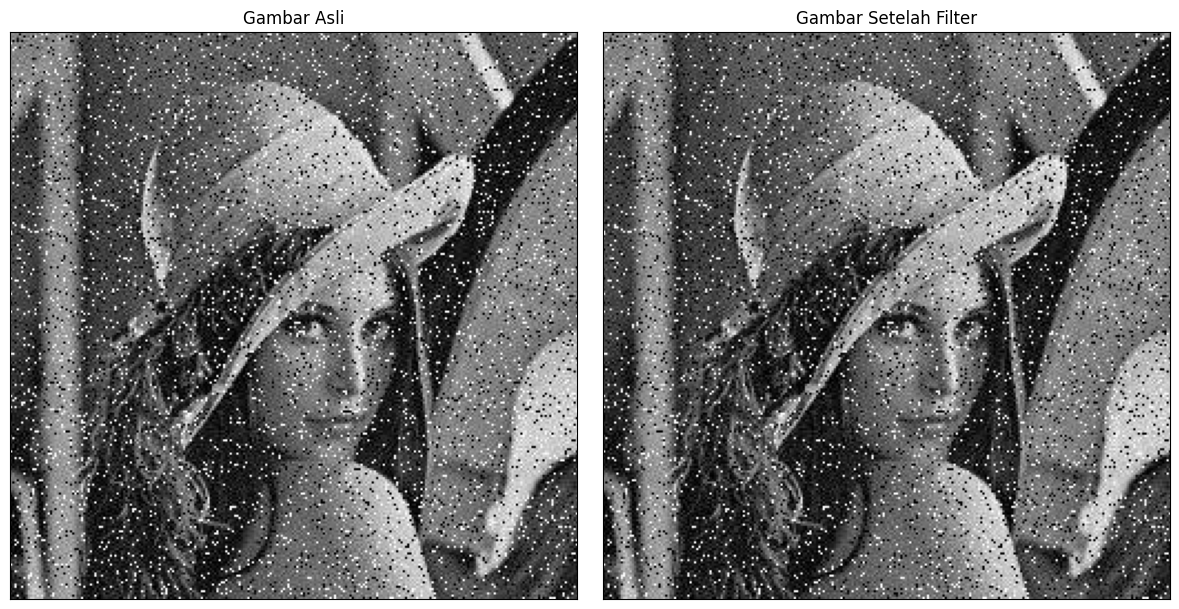

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_noisy, cmap='gray')
plt.title('Gambar Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title('Gambar Setelah Filter')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

## Filter Median untuk Menghilangkan Noise

Filter median adalah filter non-linear yang mengganti nilai piksel dengan nilai median dari piksel-piksel di sekitarnya dalam jendela (kernel). Ini sangat efektif untuk mengurangi noise tipe salt-and-pepper.

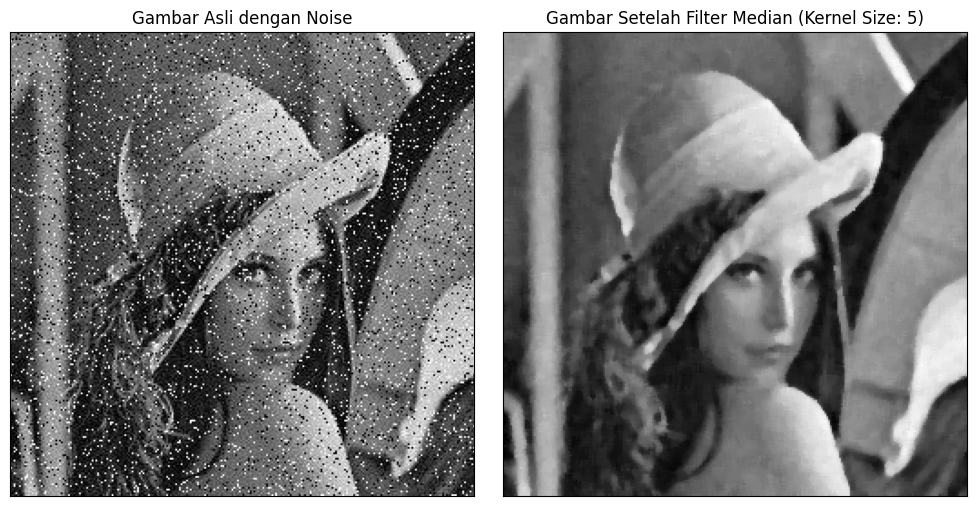

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Muat gambar grayscale (ganti 'nama_gambar_noise.jpg' dengan nama file gambar Anda)
# Pastikan gambar ini mengandung noise yang ingin dihilangkan
try:
    img_noisy = cv2.imread('noise.png', 0) # Menggunakan gambar 'noise.png' dari sesi sebelumnya
    if img_noisy is None:
        raise FileNotFoundError("Gambar 'noise.png' tidak ditemukan.")
except FileNotFoundError as e:
    print(e)
    print("Pastikan file gambar ada di direktori yang benar.")
    # Buat gambar dummy jika file tidak ditemukan untuk demonstrasi
    img_noisy = np.random.randint(0, 256, (200, 200), dtype=np.uint8)
    # Tambahkan noise salt-and-pepper sederhana ke gambar dummy
    row, col = img_noisy.shape
    num_pixels = int(0.1 * row * col)
    for i in range(num_pixels):
        y = np.random.randint(0, row)
        x = np.random.randint(0, col)
        img_noisy[y, x] = 0 if np.random.rand() < 0.5 else 255


# Terapkan filter median
# Ukuran kernel harus bilangan ganjil yang lebih besar dari 1
kernel_size = 5
img_filtered = cv2.medianBlur(img_noisy, kernel_size)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_noisy, cmap='gray')
plt.title('Gambar Asli dengan Noise')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title(f'Gambar Setelah Filter Median (Kernel Size: {kernel_size})')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()